<a href="https://colab.research.google.com/github/leegyuhi/oooooooooooooh/blob/master/%EA%B3%B5%ED%95%99%EC%A0%84%EC%82%B0%EC%9D%91%EC%9A%A9_%EC%B5%9C%EC%A2%85%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()

rdkit is already installed
rdkit is already installed


#Ⅰ SMILES-A Simplified Chemical Language
SMILES(Simplified Moledcular Input Line Entry System)
<br> 분자와 반응을 입력하고 나타내는 줄 표기법입니다.
SMILES는 컴퓨터 데이터 구조가 아니라 언어 구조이기 때문에 유용하게 쓰입니다. 구조에 대한 SMILES 표현은 많은 화학 정보를 포함하고 있습니다. 각 분자는 고유한 SMILES가 존재함으로 인하여 이것으로 인해 이 분자의 모양을 알 수 있습니다. 또한 SMILES를 이용하면 같은 구조를 나타내는데에 필요한 용량이 적습니다.
###SMILES의 예시
<h3>SMILES | <h3> <center>Name</center> | <h3>SMILES | <h3><center>Name</center>
---- | ---- | ---- | ----
<h3>CC |<h3>ethane|<h3> [OH3+] | <h3>hydronium ion
<h3>O=C=O |<h3>carbon dioxide| <h3>[2H]O[2H] | <h3>deuterium oxide
<h3>C#N |<h3>hydrogen cyanide(HCN)| <h3>[235U] | <h3>uranium-235
<h3>CCN(CC)CC |<h3>triethylamine|<h3> F/C=C/F |<h3> E-difluoroethene
<h3>CC(=O)O |<h3>acetic acid|<h3> F/C=C\F | <h3>Z-difluoroethene
<h3>C1CCCCC1 |<h3>cyclohexane($C_{6}H_{12}$)|<h3> N'['C@@H']'(C)C(=O)O |<h3> L-alanine
<h3>c1ccccc1 |<h3>benzene| <h3>N'['C@H']'(C)C(=O)O |<h3> D-alanine

<h3> Reaction SMILES |<h3> Name
---- | ----
<h3>[I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI |<h3> 치환반응
<h3>(C(=O)O).(OCC)>>(C(=O)OCC).(O) | <h3>분자간 에스테르화

###SMILES를 사용하는 예시


1.   데이터베이스 액세스를 위한 키
2.   연구원들이 화학 정보를 교환하는 메커니즘
3.   화학 데이터 입력 시스템
4.   인공 지능 또는 화학 전문가 시스템 언어의 일부 




##1. Canoncalization(정규화)
  SMILES는 분자 구조를 선 2차원 그림으로써 분자 구조를 나타냅니다. 카이랄 또는 동위 원소 정보는 없이 원자 및 결합만 나타내는 SMILES를 generic SMILES이라고 하고 하나의 특수한 일반 SMILES를 생성하기 위한 표준화 알고리즘을 Unique SMILES, 동위 원소 및 카이랄을 나타내는 SMILES를 isomeric SMILES라고 합니다. Unique isomeric SMILES를 absolute SMILES라고 합니다.

<h3>Input SMILES | <h3>Unique SMILES
---- | ----
<h3>OCC | <h3>CCO
<h3>[CH3][CH2][OH] | <h3>CCO
<h3>C-C-O | <h3>CCO
<h3>C(O)C | <h3>CCO
<h3>OC(=O)C(Br)(Cl)N | <h3>NC(Cl)(Br)C(=O)O
<h3>ClC(Br)(N)C(=O)0 | <h3>NC(Cl)(Br)C(=O)O
<h3>O=C(O)C(N)(Br)Cl | <h3>NC(Cl)(Br)C(=O)O

##2. SMILES Specification Rules(SMILES 명시 규칙)

SMILES 표기법은 공백이 없는 일련의 문자로 구성되고 수소 원자는 생략되거나 포함 될 수 있다. 방향족 구조는 직접  또는 Kekule 방식으로 나타낼 수 있습니다. SMILES 인코딩 규칙에는 원자, 결합, 가지, 고리 ecification Rules(SMILES 명시 규칙)

SMILES 표기법은 공백이 없는 일련의 문자로 구성되고 수소 원자는 생략되거나 포함 될 수 있습니다. 방향족 구조는 직접  또는 Kekule 방식으로 나타낼 수 있다. SMILES 인코딩 규칙에는 일반적으로 원자, 결합, 가지, 고리 닫힘, 단절 다섯 가지가 있습니다.




###2.1 Atom(원자)

원자는 원자 기호로 표시되어지고 SMILES에서 유일하게 필요한 문자 사용입니다. 수소가 아닌 원자는 []로 묶인 원자 기호로 독립적으로 나타낼 수 있습니다. organic subset인 B,C,N,O,P,S,F,Cl,Br,I 는 부착된 수소의 수가 최저 원자가를 따르는 경우 괄호 없이 나타낼 수 있습니다. 여기서 최저 원자가는 B(3),C(4),N(3,5),O(2),P(3,5),S(2,4,6),할로젠 원소(1)으로 나타내어 지는 것을 말합니다. 지방족 탄소는 대문자 C로 나타내어지고 방향족 탄소는 소문자 c로 나타냅니다.

ex)괄호없이 쓸 수 있는 SMILES

<h3>SMILES |<h3> Name |<h3> Chemial formula
---- | ---- | ----
<h3>C |<h3> methane | <h3>(CH4)
<h3>P | <h3>phosphine | <h3>(PH3)
<h3>N | <h3>ammonia | <h3>(NH3)
<h3>S |<h3> hydrogen sulfide | <h3>(H2S)
<h3>O |<h3> water | <h3>(H2O)
<h3>Cl | <h3>hydrochloric acid | <h3>(HCl)


ex)괄호가 있어야 쓸 수 있는 SMILES
<h3>SMILES |<h3> Name
---- | ----
<h3>$[S]$ | <h3>elemental sulfur
<h3>$[Au]$ | <h3>elemental gold
<h3>$[H]$ | <h3>Hydrogen Atom
<h3>$[C]$ | <h3>elemental carbon(Graphite)

괄호안에서 부착 된 수소와 전하는 항상 지정되어야합니다. 부착 된 수소의 수는 기호 H와 선택적 숫자로 표시가 되고 전하는 +또는 - 기호 중 한나와 숫자로 표시되어집니다. 지정되지 않은 경우 전하는 0으로 가정되어지고 숫자를 이용하지 않고 +나 -를 그 수만큼 사용하여 나타내어도 됩니다. ex) [Fe+++]=[Fe+3]

ex)SMILES로 나타낸 전하
<h3>Atoms |<h3> Name
---- | ----
<h3>[H+] |<h3> proton
<h3>[Fe+2] |<h3> iron (II)cation
<h3>[Fe++] |<h3>iron (II)cation
<h3>[OH-]|<h3> hydroxyl anion
<h3>[OH3+] |<h3> hydronium cation
<h3>[NH4+] |<h3> ammonium cation
<h3>[Co+2] or [Co++] |<h3> Cobalt(II)

###2.2 Bonds(결합)
단일, 이중, 삼중 및 방향족 결합은 각각 -,=,# 및 : 으로 표시됩니다. 인접 원자는 단일 또는 방향족 결합에 의해 서로 연결되어 있는 것으로 가정됩니다. 단일 및 방향족 결합은 항상 생략 될 수 있습니다.

ex) 결합을 나타내는 SMILES

<h3>SMILE |<h3> Name | <h3>chemical fomula
---- | ---- | ----
<h3>CC |<h3> ethane | <h3>(CH3CH3)
<h3>C=O | <h3>formaldehyde |<h3> (CH2O)
<h3>C=C |<h3>ethene |<h3> (CH2=CH2)
<h3>O=C=O | <h3>carbon dioxide |<h3> (CO2)
<h3>COC |<h3> dimethyl ether |<h3> (CH3OCH3)
<h3>C#N | <h3>hydrogen cyanide |<h3> (HCN)
<h3>CCO or C-C-O | <h3>ethanol | <h3>(CH3CH2OH)
<h3>[H][H] | <h3>molecular hydrogen |<h3> (H2)

선형 구조의 경우, SMILES 표기법은 수소 및 단일 결합이 일반적으로 생략된다는 점을 제외하고는 일반적인 표기법에 해당됩니다. ex) 6-hydroxy-1,4-hexadiene은 여러가지의 SMILES로 나타낼 수 있습니다.
<h3>Structure |<h3> Vaild SMILES
---- | ----
 | <h3>C=CCC=CCO
<h3>CH2=CH-CH2-CH=CH-CH2-OH |<h3> C=C-C-C=C-C-O
 | <h3>OCC=CCC=C

###2.3 Branch(가지)

가지는 소괄호로 묶어 지정되고 중첩되거나 쌓일 수 있습니다. 소괄호로 묶은 식에 대한 연결은 왼쪽에 있습니다.

<h3>Triethylamine |<h3> Isobutyric acid |<h3> 3-propyl-4-isopropyl-1-heptene
---- | ---- | ----
![Triethylamine](http://www.daylight.com/dayhtml/doc/theory/theory1.gif) | ![ Isobutyric acid](http://www.daylight.com/dayhtml/doc/theory/theory2.gif) | ![3-propyl-4-isopropyl-1-heptene](http://www.daylight.com/dayhtml/doc/theory/theory3.gif)
<h3>CCN(CC)CC |<h3> CC(C)C(=O)O |<h3> C=CC(CCC)C(C(C)C)CCC <br>

ex)
<h3>Image |<h3>SMILES |<h3> name
---- | ---- | ----
 ![Fluoroform](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/fluoroform.gif)| <h3>C(F)(F)F or FC(F)F|<h3>Fluoroform   
 ![4-Heptanoic Acid](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/heptanoic.gif)|<h3> CCCC(C(=O)O)CCC  | <h3>4-Heptanoic Acid  
 ![Acetic Acid](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/acetic.gif)| <h3> CC(=O)O |  <h3>Acetic Acid

### 2.4 Cyclic Structures(순환 구조)
고리 구조는 각 고리에서 하나의 결합을 끊는 것으로 표현되어집니다. 고리 폐쇄를 원자 기호 바로 다음에 숫자를 넣어주는것으로 고리 개방을 나타내어 줍니다. 

ex)Cyclohexane

![Cyclohexane](http://www.daylight.com/dayhtml/doc/theory/theory4.gif)



동일 구조에 대해 다양한 방법으로 나타낼 수 있습니다.
ex)1-methyl-3-bromo-cyclohexene-1
![1-methyl-3-bromo-cyclohexene-1](http://www.daylight.com/dayhtml/doc/theory/theory5.gif)

(a) Br을 가지로 본 경우 , (b) (CC1)을 가지로 본 경우



단일 원자는 둘 이상의 고리 폐쇄를 가질 수 있습니다.

ex)cubane

![Atom with 2ring](http://www.daylight.com/dayhtml/doc/theory/theory6.gif) <br><br>

필요한 경우, 고리 닫힘을 나타내는 숫자를 재사용 할 수 있습니다. 

![reuse#](http://www.daylight.com/dayhtml/doc/theory/theory7.gif)
<br><br>
O1CCCCC1N1CCCCC1

고리 닫힘의 숫자 재사용으로 인하여 10개 이상의 고리를 가지는 구조를 나타 낼 수 있습니다. 필요하거나 원하는 경우, % 로 두 자리 숫자를 앞에 두어 더 높은 번호의 고리 마감을 지정할 수 있습니다. ex)C2%13%24 는 고리 닫힘 2, 13 및 24를 갖는 탄소 원자입니다.

ex)
<h3>Image |<h3>SMILES |<h3> name
---- | ---- | ----
 ![Cyclohexane](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/cyclohexane.gif)| <h3>C1CCCCC1|<h3>Cyclohexane
 ![Decalin](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/decalin.gif)|<h3>C12CCCCC1CCCC2 or<br>  C1CC2CCCCC2CC1  | <h3>Decalin  
 ![Bicyclohexane](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/bicyclohexane.gif)| <h3> C1CCCCC1C1CCCCC1 |  <h3>Bicyclohexane
![Cyclohexene](https://www.daylight.com/dayhtml_tutorials/smi2gifImages/cyclohexene.gif)| <h3> C1=CCCCC1 or <br> C=1CCCCC1 or <br> C1CCCCC=1 or <br>  C=1CCCCC=1 |  <h3>Cyclohexene

###2.5 Disconnected Structures(분리된 구조)
분리된 화합물은 "."을 이용하여 구분 된 개별 구조로 작성됩니다. 이온 또는 리간드(ligand)가 나열되는 순서는 임의적입니다. 한 전하와 다른 전하가 연결되어 있지 않으며 또한 전하를 띄지 않을 필요는 없습니다. 하나의 이온 SMILES는 다른 이온 내에 매립 될 수 있습니다. 

ex)sodium phenoxide

![sodium phenoxide](http://www.daylight.com/dayhtml/doc/theory/theory8.gif)
<br><br>

<h3>SMILE |<h3> Name | <h3>chemical fomula
---- | ---- | ----
<h3>CCO.O |<h3> Ethanol and Water | <h3>(CH3CH3)
<h3>[Na+].[Cl-] | <h3>Sodium Chloride |<h3> (NaCl)



같은 자리수를 가지는 원자쌍은 서로 결합되어 있음을 의미합니다. 결합은 명시적(결합 기호 및 /또닌 고리 닫힘 앞의 방향) 또는 암시적(비 방향성 단일 또는 방향족 결합)일 수 있습니다. 이것은 결합이 고리의 일부로 끝나는 것과 상관없이 적용됩니다.


##3. Isomeric SMILES(이성질체 SMILES)

SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분적 명SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분SMILES의 이성질체 규칙을 사용하면 알려진 구조에 대해 카이랄성을 지정할 수 있습니다. CIP 및 IUPAC와 같은 대부분의 기존 화학 명명법과 달리 이 규칙은 엄격한 카이랄성 부분적 명시를 할 수 있습니다. SMILES의 모든 이성질체 규칙은 선택 사항이고 이러한 내용이 들어가 있지 않는다면 지정된 값이 없다는 것을 의미합니다.


###3.1 Isotopic Specification(동위원소)

동위 원소는 동위원소의 질량을 숫자로 원자 기호 앞에 표시합니다.

<h3>SMILES | <h3>Name
---- | ----
<h3>$[12C]$ | <h3>carbon-12
<h3>$[13C]$ | <h3>carbon-13
<h3>$[C]$ | <h3>carbon(unspecified mass)
<h3>$[13CH4]$ | <h3>C-13 methane


###3.2 Configuration Around Double Bonds(이중결합을 둘러싼 배열)

이중결합을 둘러싼 배열은 "directional bonds(방향결합)"을 나타내는 문자인 /와\를 이용하여 나타낼 수 있고 단일 또는 방향족  결합의 종류로 생각할 수 있습니다. 기호는 연결된 원자 사이의 상대적인 방향성을 나타내며, 이중 결합 된 두 원자 모두에서 발생하는 경우에만 의미가 있습니다. 
<h3>E-1,2-difluoroethene | <h3>Z-1,2-difluoroethene
---- | ----
<h3>![E](http://www.daylight.com/dayhtml/doc/theory/theory9.gif) | <h3>![Z](http://www.daylight.com/dayhtml/doc/theory/theory10.gif)
<h3>F/C=C/F | <h3>F/C=C\F
<h3>F\C=C\F |<h3> F\C=C/F

SMILES의 카이랄성 규약과 CIP같은 규약의 차이점은 SMILES는 부분적인 명시를 통하여 국부적으로 카이랄성을 나타낼 수 있다는 것입니다.



![complete](http://www.daylight.com/dayhtml/doc/theory/theory11.gif) | ![partial](http://www.daylight.com/dayhtml/doc/theory/theory12.gif)
---- | ----
<h3>F/C=C/C=C/C | <h3> F/C=C/C=CC
<h3>(completely specified) | <h3>(partially specified)



###3.3. Configuration Around Tetrahedral Centers(사면체의 중심을 포함하는 구조)

SMILES는 국부적 카이랄성에 기반한 매우 일반적인 카이랄성 명시법을 사용합니다. 방향은 SMILES 문자열에서 인접 항목 순으로 나타냅니다. SMILES에서 사면체의 중심은 카이랄 원자의 원자 기호 다음에 @ 또는 @@ 두개를 사용하여 표시합니다. 카이랄 원자에 대해 명시가 되지 않을 경우 카이랄성은 지정되지 않습니다. 



![u.c](http://www.daylight.com/dayhtml/doc/theory/theory13.gif) | ![s.c](http://www.daylight.com/dayhtml/doc/theory/theory14.gif)
---- | ----
NC(C)(F)C(=O)O | N$[C@]$(C)(F)C(=O)O(anticlockwise)
NC(F)(C)C(=O)O | N$[C@@]$(F)(C)C(=O)O(clockwise)
unspecified chirality | specified chirality

 " @ "는 이웃하는 원자들이 시계 반대 방향으로 나열됨을 나타내고 " @@ "는 이웃하는 원자들이 시계 방향으로 나열되어 있음을 나타냅니다.

 중심 탄소가 SMILES에 첫 번째 원자가 아니고 수소가 부착되어 있으면 수소는 다음에 나오는 세 이웃 원자들 중 첫 번째 우너자로 간주되어집니다. 중심 탄소가 SMILES에서 첫 번째 원자라면 내제 된 수소는 원자로 간주되어집니다. 수소가 명시적으로 나타내어 질 경우 다른 원자와 같이 취급됩니다.

<img src="http://www.daylight.com/dayhtml/doc/theory/theory15.gif" width="200" height="200" />| <img src="http://www.daylight.com/dayhtml/doc/theory/theory16.gif" width="200" height="200" />
----|----
$N[C@@]([H])(C)C(=O)O$ | $N[C@]([H])(C)C(=O)O$
$N[C@@H](C)C(=O)O$ | $N[C@H](C)C(=O)O$
$N[C@H](C(=O)O)C$ | $N[C@@H](C(=O)O)C$
$[H][C@](N)(C)C(=O)O$ | $[H][C@@](N)(C)C(=O)O$
$[C@H](N)(C)C(=O)O$ | $[C@@H](N)(C)C(=O)O$

고리 닫힘 결합의 카이랄 순서는 고리 닫힘 숫자가 카이랄 원자 상에 나타나는 순서에 의해 나타내어 집니다.
|![1](http://www.daylight.com/dayhtml/doc/theory/theory17.gif)|
----
|C$[C@H]$1CCCCO1|
|or|
|O1CCCC$[C@@H]$1C|


###3.4 General Chiral Specification(일반적 카이랄 사양)

사면체 구조 외에 많은 종류의 카이랄성이 존재합니다. 위에서 사용하였던 "@"기호는 일반적인 카이랄 사양 중 특별한 경우에 사용합니다.

일반적 카이랄 사양에는 "@"기호, 2문자 카이랄 클래스 표시  지표, 수적 순열 지정이 있습니다. 기본적인 카이랄 클래스는 각각의 차수 즉 연결 수에 따라 할당 됩니다. 4개의 연결에 대한 기본 클래스는 위에서 보았던 4면체(TH)이다.
대부분의 경우 @1표시는 SMILE의 순서를 기준으로한 축에 반시계 방향으로 @2표시는 시계방향을 의미합니다.
'@@'와 '@@@'는 '@2'와'@3'으로 해석됩니다.
"@@"및 "@@@" 형식의 표기법은 앞에서 전하를 나타낸 것과 같이 "@2"및 "@3"을 나타냅니다.위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것입니다. SMILES는 대칭으로 인하여 감소된 거울상 이성질체를 뜻하는 "감소된 카이랄성"과 중심치환으로 인해 중심이 비카이랄성이 되는 "퇴화한 카이랄성"을 포함하여 넓은 범위를 다룰 수 있습니다. SMILES 시스템은 특정 사양에 대해 고유 한 이성질체 SMILES를 생성하며 모든 유형의 키랄성에서 인식이 올바르게 작동하도록 합니다.

 사면체, 유사 알렌(allen-like), 정사각형, 삼각뿔, 팔면체 등의 카이랄이 있고 이 5가지 클래스는 매우 흔하고 자주 다루어 집니다.




####유사 알렌(allen-like) 

유사 엘렌 클래스의 기호는 AL로 나타낸다. 2차수의 카이랄 클래스 default이고 중심원자는 이중 결합을 가집니다. 치환 된 C = C = C 구조가 가장 흔하지 만, C = C = C = C = C 구조와 같이 홀수 개의 일련의 이중 결합 원자원자도  유사 알렌에 포함됩니다. @ AL1 (@)과 @ AL2 (@@)을 사용하여 나타내고 치환된 원자의 중첩과 각각의 사면체의 평가에 의해 해석됩니다. 치환된 유사알렌 원자에 부착 된 수소는 그 원자 바로 뒤에 있는 것으로 간주되어 집니다.

  ![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
<h3>OC(Cl)=$[C@]$=C(C)F | <h3>OC=$[C@]$=CF
<h3>OC(Cl)=$[C@AL1]$=C(C)F | <h3>OC($[H]$)=$[C@AL1]$=C($[H]$)F

####정사각형

정사각형 클래스의 기호는 SP로 나타냅니다. 사용 가능한 값은 @SP1,@SP2, SP3가 있으나 차수가 4개인 카이랄 클래스의 default는 아니고 줄여서 사용할 수가 없습니다. 그리고 시계방향과 반시계방향이 적용되지 않는다는 점에서 다른 클래스들과 차이를 보입니다.

<img src="http://www.daylight.com/dayhtml/doc/theory/theory20.gif" width="140" height="200" /> | -
---- | ----
$F[Po@SP1](Cl)(Br)I$ | <h7>(SP1 lists in a "U shape")
$F[Po@SP2](Br)(Cl)I$ | (SP2 lists in a "4-shape")
$F[Po@SP3](Cl)(I)Br$ | (SP3 lists in a "Z shape")

####삼각뿔형

삼격뿔 형의 클래스 기호는 TB입니다. 이것은 차수가 5인 기본 카이랄 클래스입니다. 가능한 값은 @TB1 ~ @TB20까지 있습니다. @TB1(@)은 한 축 연결에서 다른 축 연결로 나열 될 때 3개의 수평적으로 연결된 중간원자가 시계 반대 방향으로 나열됨을 나타내고 @TB2(@@)는 시계 방향으로 나열됨을 나타냅니다.

|![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif)|
----
|<h3>S$[As@@]$(F)(Cl)(Br)C=O<br>|
|<h3>O=C$[As@]$(F)(Cl)(Br)S<br>|

####8면체

8면체 클래스의 기호는 OH입니다. 차수 6을 가지는 기본 카이랄 클래스이고 사용하는 값은 @OH1 ~ @OH30을 사용합니다. @OH1(@)는 한 축연결에서 다른 축 연결로 나열될때 수평적으로 연결된 4개의 중간 원자가 반 시계 방향으로 나열됨을 나타냅니다. @OH2(@@)는 시계 방향을 나타냅니다.

|![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)|
----
|S$[Co@@]$(F)(Cl)(Br)(I)C=O<br>|
|O=C$[Co@]$(F)(Cl)(Br)(I)S|

In [0]:
#RDkit 적용
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

## 4. SMILES Conventions(관례)
앞의 규칙 외에도 SMILES에서 사용되는 몇가지 관례들이 있습니다.

###4.1 Hydrogens(수소)
SMILES로 작성할 때 대부분의 유기 구조에서 수소 원자는 일반적으로 생략됩니다. 수소의 존재는 세가지 방식으로 표시될 수 있습니다.
 * 암시적인 방식 : 일반적인 원자가 가정으로부터 대괄호([ ])로 표시되지 않은 원자
 * 명시적인 방식 : 대괄호([ ])안에 수소의 수를 표시
 * 수소 원자 : **[H]**원자

또한 유기 및 무기 명명법에는 차이가 없습니다.

수소를 명확하게 표시해줘야 하는 4가지 경우가 있습니다.
 * 전하를 가지는 수소 : **[H+]**
 * 다른 수소와 연결된 수소 : 분자수소(**[H][H]**)
 * 두개 이상의 다른 원자와 연결된 수소 : bridging hydrogens
 * 동위원소 수소 : 중수(**[2H]O[2H]**)

RDKit WARNING: [16:08:38] WARNING: not removing hydrogen atom without neighbors


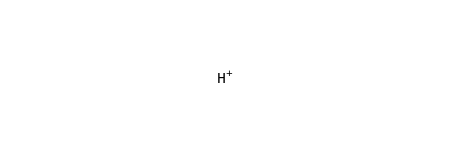

In [0]:
Chem.MolFromSmiles('[H+]')

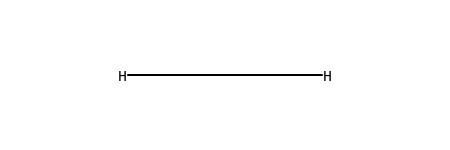

In [0]:
Chem.MolFromSmiles('[H][H]')


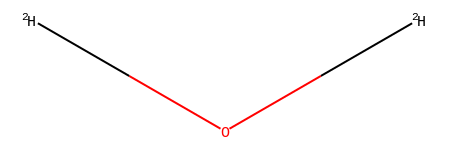

In [0]:
Chem.MolFromSmiles('[2H]O[2H]')

### 4.2 Aromaticity(방향성)
분자의 대칭성을 특징짓기 위해 SMILES와 같은 시스템에서 방향성에 대한 명확한 화학 명명법이 추론되어야 한다. 효과적인 방향족 검출 알고리즘이 주어지면, 사용자가 지방족(Kekulé-like) 구조입력을 선호하는 경우 방향성으로 입력할 필요가 없다. 방향성으로 구조물을 입력하면 짧게 입력해서 정확한 화학구조를 얻을 수 있다.

SMILES 알고리즘은 확장된 버전의 Hueckel 규칙을 사용하여 방향족 분자 및 이온을 식별합니다.
> 방향족으로서 자격을 갖기 위해서는
> 1. 고리의 모든 원자가 $sp^{2}$ 혼성화 되어있어야 한다.
> 2. 고리에 (4N+2)개의 $\pi$전자를 가져야한다.

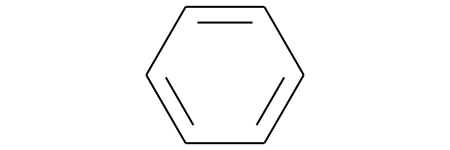

In [0]:
Chem.MolFromSmiles('c1ccccc1') #aromatic

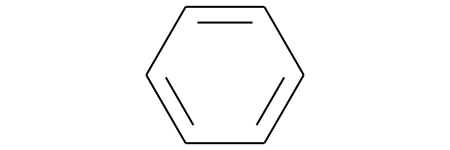

In [0]:
Chem.MolFromSmiles('C1=CC=CC=C1') #aliphatic

조건에서 2번을 만족하지 않는것을 anti-aromatic이라고 한다 c1ccc1, c1ccccccc1 같은 경우가 있는데 SMILES 시스템에서 내재된 $sp^{2}$혼성화, 수소 수 및 지정된 공식전하(있는 경우)를 보존하는 구조를 찾습니다. 따라서 C1=CC=C1와 C1=CC=CC=CC=C1에 대한 정확한 anti-aromatic 구조를 생성합니다.

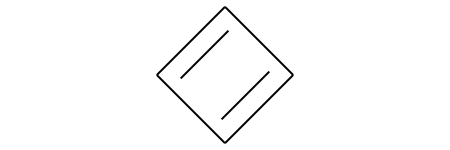

In [0]:
Chem.MolFromSmiles('c1ccc1') #anti-aromatic

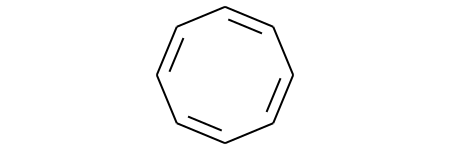

In [0]:
Chem.MolFromSmiles('c1ccccccc1') #anti-aromatic

그러나 c1cccc1과 같은 일부 입력은 정확하지 않을 수도 있고 불가능할 수도 있습니다. 여기서 탄소 원자 중 하나가 2개의 수소가 부착된 $sp^{3}$이기 때문에 c1cccc1은 C1=CCC=C1으로 전환될 수 없다. 이러한 구조에서 단일 및 이중결합이 교대로 이루어질 수 없기 때문에 SMILES 시스템은 이를 "불가능한" 입력이라고 표시합니다. 또한 고리 밖에 있는 이중결합은 방향성을 파괴하지 않는다.

In [0]:
Chem.MolFromSmiles('c1cccc1') #aromatic으로 입력했지만 aromatic이 아니기에 오류가 발생

RDKit ERROR: [16:08:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 


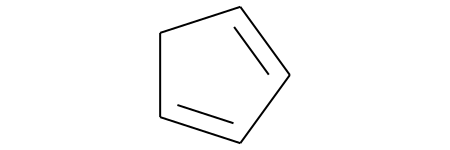

In [0]:
Chem.MolFromSmiles('C1=CCC=C1') #aliphatic

몇가지 추가적인 aromatic

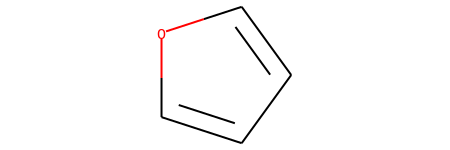

In [0]:
Chem.MolFromSmiles('c1cocc1')

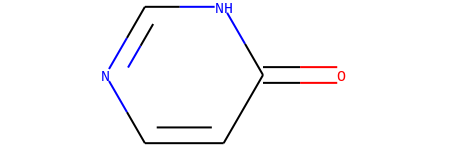

In [0]:
Chem.MolFromSmiles('c1cnc[nH]c(=O)1')

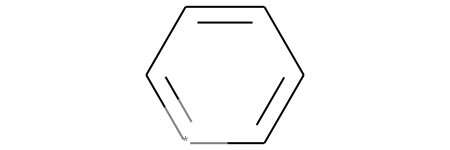

In [0]:
Chem.MolFromSmiles('c1c*ccc1') # *은 와일드카드

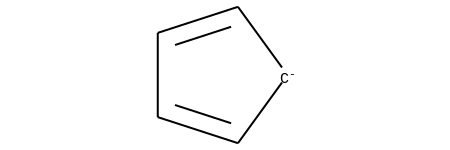

In [0]:
Chem.MolFromSmiles('[cH-]1cccc1')

### 4.3 Aromatic Nitrogen Compounds(방향족 질소 화합물)
방향족 질소의 경우 방향족 질소 기호인 n으로 지정될 수 있다.

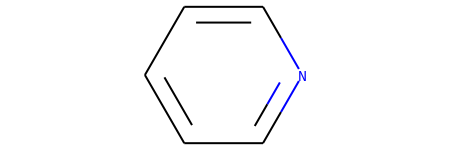

In [0]:
Chem.MolFromSmiles('n1ccccc1') # pyridine

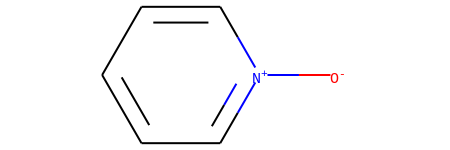

In [0]:
Chem.MolFromSmiles('O=n1ccccc1') # pyridine-N-oxide

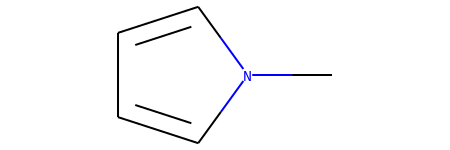

In [0]:
Chem.MolFromSmiles('Cn1cccc1') # methylpyrrole

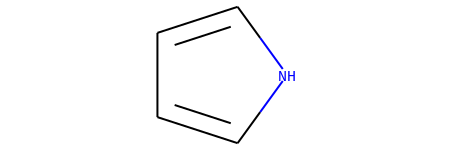

In [0]:
Chem.MolFromSmiles('[nH]1cccc1') # pyrrole

pyrrole의 질소는 pyridine의 질소와 구별하기 위해서 **[nH]**라고 쓴다.

### 4.4 Bonding Conventions (결합 관례)
SMILES는 분자 구조를 모델링하기 위해 어떤 원자가 규칙을 사용해야하는지 지시하지 않습니다.SMILES를 사용하면 동일한 구조를 다양한 모델로 설명할 수 있고 원하는대로 원자의 전하를 나타낼 수 있다는 장점이 있습니다.

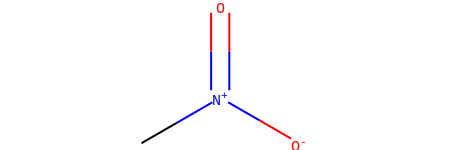

In [0]:
Chem.MolFromSmiles('CN(=O)=O') # nitromethane

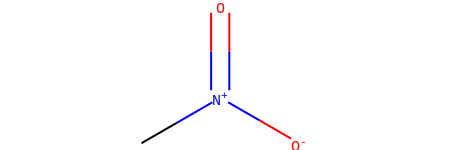

In [0]:
Chem.MolFromSmiles('C[N+](=O)[O-]') # nitromethane

일반적으로 대칭성이 문제가 되지 않는 경우 특이한 원자가 상태에서 원자를 나타내는 것을 피할 수 있으면 전하 분리 구조를 선호합니다. 예를 들어 diazomethane은 C=[N]=[N]보다 C=[N+]=[N-]로 하는 것을 선호합니다.

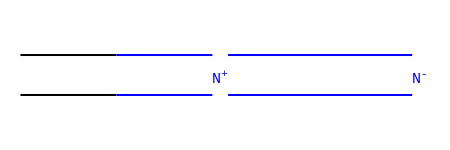

In [0]:
Chem.MolFromSmiles('C=[N+]=[N-]') # diazomethane

### 4.5 Tautomers
Tautomeric 구조는 SMILES에서 명확하게 지정된다. "tautomeric bond", "mobile hydrogen", "mobile charge"에 대해 정해진 것은 없다. 하나의 tautomeric form을 고려할 때 대부분의 화학 정보 시스템은 필요한 경우 알려진 모든 tautomer에 대한 데이터를 보고할 것이다. SMILES의 역할은 요청된 tautomeric form과 데이터가 있는 위치를 정확히 지정하는 것이다.

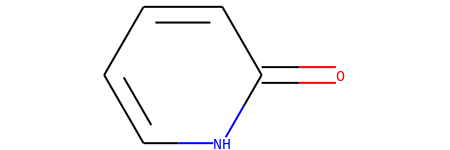

In [0]:
Chem.MolFromSmiles('O=c1[nH]cccc1') # 2-pyridone

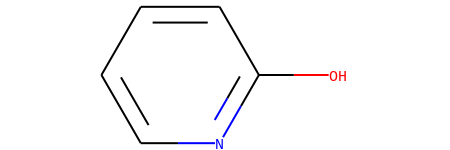

In [0]:
Chem.MolFromSmiles('Oc1ncccc1') # 2-pyridinol

## 5. Extensions for Reactions(반응으로의 확장)
SMILES 언어는 반응을 처리하도록 확장되어진다.  
반응의 구성요소는 ">"를 사용하여 구분한다.  
반응을 나타내는 전체문자 내에 반드시 2개의 ">"가 있어야한다.
 * reactant > agent > product
 * reactant >> product

예시를 보겠습니다.

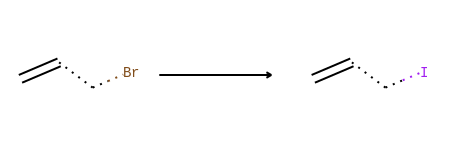

In [0]:
AllChem.ReactionFromSmarts('C=CCBr>>C=CCI')
# 작용제는 없고, 반응에서 몇명 원자가 빠져있는 상태입니다.

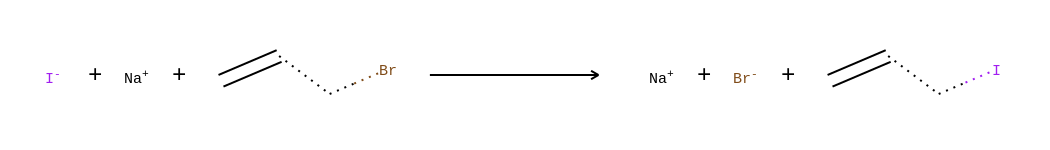

In [0]:
AllChem.ReactionFromSmarts('[I-].[Na+].C=CCBr>>[Na+].[Br-].C=CCI')
# 위 반응과 동일하고 더 완전한 형태입니다.

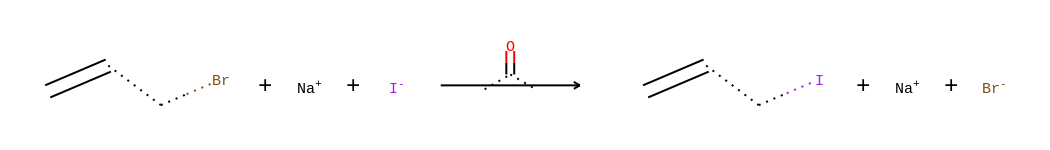

In [0]:
AllChem.ReactionFromSmarts('C=CCBr.[Na+].[I-]>CC(=O)C>C=CCI.[Na+].[Br-]')
# 위 반응들과 동일하고 작용제가 추가되었습니다.

그러나 위의 예시를 보면 어느 탄소에 반응이 일어났지를 알 수가 없다. 따라서 Atom Map이 필요하다.



### 5.1 Reaction Atom Maps(반응 원자 지도)
Atom mapping은 반응분자에서 원자의 특성이다. Atom map은 컴퓨터에게 반응의 반응물과 생성물에서 동일한 원자가 무엇인지 알려준다. SMILES 언어 내에서 Atom map은 원자 뒤에 ":"와 숫자로 표시한다([CH3:2]는 탄소에 2번을 부여한다는 의미이다.). 이 숫자는 동일한 숫자를 가진 모든 원자를 서로 연관시키는 것을 제외하고는 추가적인 의미가 없다.

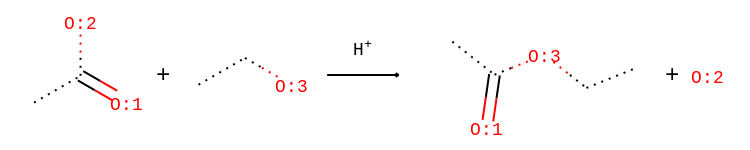

In [0]:
AllChem.ReactionFromSmarts('CC(=[O:1])[OH:2].CC[OH:3]>[H+]>CC(=[O:1])[O:3]CC.[OH2:2]')

Atom mapping은 완전하거나 유일하지 않고 기본 분자의 연결 및 속성과 독립적입니다.  

1. 반응이 일어날 때 나타나는 분자의 결합의 표현에 한계가 있다. 예를 들어 sodium acetate(CC(=O)[O-].[Na +])속의 산소를 화학적으로 구분할 수 없습니다. 일부 시스템은 이 동등성을 인식하는데, `[CH3:1][C:2](=[O:3])[O-:3].[Na+:4]`와 같이 이들에 같은 숫자로 Map을 합니다.


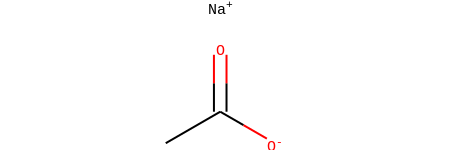

In [0]:
AllChem.MolFromSmiles('CC(=O)[O-].[Na+]')

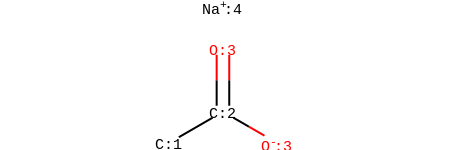

In [0]:
AllChem.MolFromSmiles('[CH3:1][C:2](=[O:3])[O-:3].[Na+:4]')

2. 반응 메커니즘에 모호성이 있는 경우  
![secondcase](http://www.daylight.com/dayhtml/doc/theory/cope.gif) <br>
위의 경우 실제로 2가지 메커니즘이 있지만 `[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]`으로 표현해줍니다.

3. 반응 자체에 대한 정보가 부족한 경우. 

4. Atom map에서 임의로 지정한 숫자들은 의미를 가지지않는 숫자들이다.

### 5.2 Hydrogens(수소)
반응에서 수소는 특별하지 않으면 분자와 같이 취급합니다. 분자의 경우, 하전되어 있거나 동위원소, 다른 수소에 결합, 다중결합의 경우 특별하게 취급한다. 또한 반응의 Atom map의 일부로서 수소의 위치에 관한 정보를 저장하는 것이 종종 바람직한데(에를 들어, 1,5-hydride shift), 이 경우에도 특별한 것으로 간주된다. 

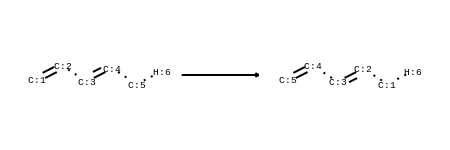

In [0]:
AllChem.ReactionFromSmarts('[CH2:1]=[CH:2][CH:3]=[CH:4][CH2:5][H:6]>>[H:6][CH2:1][CH:2]=[CH:3][CH:4]=[CH2:5]')
# 1,5-hydride shift

# Ⅱ. Sequence to Sequence
## 1. seq2seq 
시퀀스-투-시퀀스(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델입니다. 예를 들어 챗봇(Chatbot)과 기계 번역(Machine Translation)이 그러한 대표적인 예인데, 입력 시퀀스와 출력 시퀀스를 각각 질문과 대답으로 구성하면 챗봇으로 만들 수 있고, 입력 시퀀스와 출력 시퀀스를 각각 입력 문장과 번역 문장으로 만들면 번역기로 만들 수 있습니다.

![seq2seq_01](https://user-images.githubusercontent.com/52767505/70228477-c3c21b00-1797-11ea-8140-840c0aee2ddb.png)

위의 그림은 seq2seq 모델로 만들어진 번역기가 'I love you'라는 영어 문장을 받아서, 'Nan nul saranghey(난 널 사랑해)'라는 한국어 문장을 출력하는 모습을 보여줍니다. 지금부터 seq2seq 모델 내부 구성을 알아보겠습니다.

![seq2seq_02](https://user-images.githubusercontent.com/52767505/70228479-c45ab180-1797-11ea-9e70-87c6e0077258.png)

seq2seq는 크게 인코더와 디코더로 구성되어 있습니다. 인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만듭니다. 이 벡터를 context vector라고 합니다. 입력 문장의 정보가 하나의 context vector로 모두 압축되면, 이 벡터를 디코더로 전송합니다. 디코더는 context vector를 받아서 번역된 단어를 한 개씩 순차적으로 출력합니다.

![seq2seq_03](https://user-images.githubusercontent.com/52767505/70228480-c45ab180-1797-11ea-986f-e71968240e26.png)

인코더와 디코더는 각각 여러개의 RNN 셀로 구성되어 있습니다. 입력 문장을 받는 RNN 셀을 인코더라고 하고, 출력 문장을 내보내는 RNN 셀을 디코더라고 합니다. 일반적으로 RNN 셀의 성능문제 때문에 LSTM 셀이나 GRU 셀을 사용합니다. 

우선 인코더에서 입력 문장은 단어 단위로 쪼개져서 RNN 셀 각각의 입력이 됩니다. 인코더의 마지막 RNN 셀의 은닉 상태를 디코더의 RNN 셀로 넘겨주는데, 이를 컨텍스트 벡터라고 합니다. 이렇게 만들어진 컨텍스트 벡터는 앞에서 받은 모든 입력 값의 데이터를 함축적으로 가지고 있습니다. 컨텍스트 벡터는 다시 디코더 RNN 셀의 첫번째 은닉 상태로 사용됩니다.

컨텍스트 벡터를 받은 디코더는 초기 입력으로 문장의 시작을 의미하는 ```<start> ```심볼을 받습니다. 디코더가 ```<start>``` 심볼을 받으면 현재 시점에서 등장할 확률이 높은 단어를 예측합니다. 디코더의 첫번째 RNN 셀은 예측된 단어를 다음 시점의 RNN 셀의 입력으로 보냅니다. 그다음 RNN 셀은 입력된 단어로부터 다시 다음에 올 단어를 예측합니다. 디코더는 이런 식으로 입력된 단어의 다음에 올 단어를 예측하고 다음 시점의 RNN 셀의 입력으로 넣는 과정을 반복합니다. 문장의 끝을 의미하는 ```<end>``` 심볼이 다음 단어로 예측될 때 까지 이 과정을 반복합니다.

## 2. Encoder

### 2.1 Encoder

![seq2seq_07](https://user-images.githubusercontent.com/52767505/70231538-ddfef780-179d-11ea-9483-67391f9d59f3.png)

인코더에서 각각의 RNN 셀이 받은 입력을 어떻게 다음 RNN 셀로 넘기는지 좀 더 자세히 알아보도록 하겠습니다. 

현재 시점(time step)을 t라고 할 때, RNN 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 만듭니다. 이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시할 수 있습니다. 그리고 RNN 셀은 다음 시점에 해당하는 t+1의 RNN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 보냅니다.

RNN 챕터에서도 언급했지만, 이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 RNN 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값이라고 할 수 있습니다. 그렇기 때문에 앞서 우리가 언급했던 컨텍스트 벡터는 사실 인코더에서의 마지막 RNN 셀의 은닉 상태값을 말하는 것이며, 이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있다고 할 수 있습니다.

### 2.2 Embedding Layer

텍스트를 컴퓨터가 이해하고, 효율적으로 처리하게 하기 위해서는 컴퓨터가 이해할 수 있도록 텍스트를 적절히 변환할 필요가 있습니다. 단어를 표현하는 방법에 따라서 텍스트 처리의 성능이 크게 달라지기 때문입니다. 텍스트를 변환하는 방법으로는 'Word Embedding', 'Word2Vec', 'Glove'가 일반적으로 사용되고 있습니다.

![seq2seq_05](https://user-images.githubusercontent.com/52767505/70232056-e277e000-179e-11ea-860f-c045d157a2fb.png)

Seq2seq에서는 텍스트를 숫자로 변환하는 워드 임베딩을 이용합니다. 워드 임베딩은 단어를 벡터로 표현하는 것을 말합니다. 즉, seq2seq에서 사용되는 모든 단어들은 워드 임베딩을 통해 임베딩 벡터로 표현된 임베딩 벡터입니다. 

![seq2seq_06](https://user-images.githubusercontent.com/52767505/70231575-f242f480-179d-11ea-9a48-fb3726c3b8be.png)

예를 들어 I, love, you라는 단어들에 대한 임베딩 벡터는 위와 같은 모습을 가집니다. 여기서는 그림으로 표현하고자 사이즈를 4로 했지만, 일반적으로 임베딩 벡터는 수백 개의 차원을 가질 수 있습니다.


## 3. Decoder

### 3.1 Teacher Forcing

![seq2seq_08](https://user-images.githubusercontent.com/52767505/70232055-e277e000-179e-11ea-9bc1-83b63383049c.png)

Seq2seq는 훈련 과정과 테스트 과정의 작동 방식이 조금 다릅니다. 앞에서 설명한 과정은 테스트 과정에 해당됩니다. 반면, 훈련 과정에서는 교사 강요(teacher forcing)라는 방법을 이용합니다. 교사 강요란 디코더에게 인코더가 보낸 컨텍스트 벡터와 실제 정답인 "<start> I love you"를 입력 받았을 때, "Nan nul saranghey <end>"가 나와야 된다고 정답을 알려주면서 훈련하는 것입니다.

교사 강요를 사용하는 이유는 이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높기 때문입니다. 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게하고, 이런 상황이 반복되면 훈련 시간이 느려집니다.

### 3.2 Decoder

디코더에서 RNN 셀이 입력을 다음 RNN 셀로 넘기는 방법은 인코더와 동일합니다. 단, 첫번째 은닉 상태의 값으로 인코더의 마지막 RNN 셀의 은닉 상태인 컨텍스트 벡터를 사용한다는 점이 다릅니다. 디코더의 첫번째 RNN 셀은 이 첫번째 은닉 상태의 값과, 현재 t에서의 입력값인 ```<start>```로부터, 다음에 등장할 단어를 예측합니다. 그리고 이 예측된 단어는 다음 시점인 t+1 RNN에서의 입력값이 되고, 이 t+1에서의 RNN 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터. 즉, 또 다시 다음에 등장할 단어를 예측하게 될 것입니다. 

### 3.3 Softmax Equation

![seq2seq_09](https://user-images.githubusercontent.com/52767505/70232845-a9d90600-17a0-11ea-8577-ef6b8fcd2707.png)

출력 단어로 나올 수 있는 단어들은 다양한 단어들이 있습니다. seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측해야 합니다. 이를 예측하기 위해 소프트맥스 함수를 이용합니다. 디코더에서 각 시점(time step)의 RNN 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정합니다.

![seq2seq_10](https://user-images.githubusercontent.com/52767505/70232993-00464480-17a1-11ea-89f7-6881bcd3d6a4.png)


# Ⅲ Seq2seq와 SMILES를 이용한 Drug Discovery

##1. Se2seq Fingerprint Model

화학 특성을 자동으로 예측하기 위해 기계 학습 방법을 사용하는 것은 최근 약물 발견 커뮤니티에 큰 관심을 불러일으켰다. 그러나 대부분의 기계 학습 알고리즘은 고정된 길이의 연속 특성 벡터를 입력으로 사용한다. 따라서 분자들을 고정된 길이의 벡터로 표현하는 방법이 필요하다. 

이러한 문제를 해결하기 위해 'seq2seq fingerprint'를 사용한다. seq2seq fingerprint는 비지도 데이터와 딥러닝에 기반하는 분자 지문 방법이다. 이 방법은 전문적인 지식을 요구하지 않는 데이터를 기반으로 하고, 다시 분자 표현 형태로 전환할 수 있으며, 충분한 양의 데이터를 보장한다는 장점이 있다. 또한 레이블이 없기 때문에 고도의 인력과 비용을 필요로 하지 않는다.

모델이 잘 훈련된다면, 특성 벡터가 원본 분자의 모든 정보를 코드화 했다고 볼 수 있다. 따라서 seq2seq fingerprint는 엄밀한 정보를 모두 담고 있다고 추측하고, 이를 통해 분자의 특성을 예측할 수 있다. 

![xu2017_02](https://user-images.githubusercontent.com/52767505/70285828-3371ed80-180c-11ea-9643-cd01cb90784b.PNG)

첫번째로 seq2seq fingerprint 모델을 레이블이 없는 방대한 양의 샘플로 훈련시킨다. 그 다음 훈련된 모델로 레이블이 있는 데이터에서 seq2seq fingerprint를 생성한다. 예측 모델을 훈련하기 위해, 생성된 fingerprint와 레이블이 있는 데이터를 지도 학습 방법에 적용시킨다.

이러한 방법은 방대한 양의 레이블이 없는 데이터에서 상대적으로 적은 레이블이 있는 데이터에 대한 지도 훈련으로 지식을 전달할 수 있도록 한다. 즉, 최종적으로 예측 모델의 성능을 향상시키도록 한다.

비지도 seq2seq fingerprint 방법의 핵심은 입력과 출력을 SMILE로 설정한다는 것이다. 즉, SMILE 스트링을 SMILE로 번역한다. 이러한 과정의 중간 단계에서 고정된 길이의 벡터를 fingerprint로 추출한다.

이 논문에서는 seq2seq fingerprint로 불리는 새로운 비지도 분자 표현 시스템에 대해서 논의한다. 영어를 프랑스어로 번역하는 모델인 sequence to sequence 학습 모델에 기반한다. 이 모델은 분자의 SMILE 스트링을 SMILE로 변환함과 동시에 고정된 길이의 fingerprint 벡터를 생성한다. 분류 작업에 관한 실험에서 뛰어난 성능을 나타낸다. 또한, 데이터 기반 라벨이 없는 모델의 특성은 우리에게 훨씬 더 많은 이점을 가져다 준다. seq2seq fingerprint 시스템은 완전한 비지도 시스템이기 때문에, 고비용의 레이블 수집 과정이 필요없다. 즉, 각각의 유효한 분자를 이용할 수 있으며, 이론적으로는 무한의 양에 도달한다. 매우 제한된 데이터 샘플로 훈련한 지도학습모델과는 다르게, seq2seq fingerprint는 충분히 많은 양의 샘플로 훈련하기 때문에 보다 특정한 분야에 강하다.